# 산업수학 2조 발표 코드

### 목차
#### 1. 과소적합(Under Fitting) 해결법
- 모델 복잡도 증가
#### 2. 과적합(Over Fitting) 해결법
- 조기 종료(early stopping)
#### 3. 모델 저장 및 불러오기

In [1]:
# 필요한 라이브러리 import
import copy
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
plt.rcParams["figure.figsize"] = (8,6)

In [2]:
# 사용할 함수 및 데이터 정의
np.random.seed(20) # random seed 정의
x = np.linspace(-1,1,50)
y = 5*x**3 - 3*x + 1.0 + (0.5-np.random.rand(len(x))) # -0.5에서 0.5사이의 노이즈 추가

x2 = np.linspace(-1,1,100)
y2 = 5*x2**3 - 3*x2 + 1.0

## 1. 과소적합(Under Fitting) 해결법
- 모델 복잡도 증가

##### 학습 데이터 생성

In [3]:
np.random.seed(20) # random seed 정의
x_train = copy.deepcopy(x)
y_train = copy.deepcopy(y)

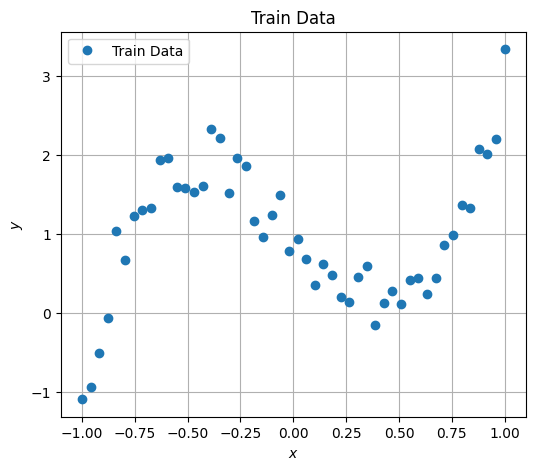

In [4]:
# 학습 데이터 그래프
plt.figure(figsize=(6, 5))
plt.plot(x_train,y_train,'o', label = 'Train Data')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Train Data")
plt.legend()
plt.show()

In [5]:
# 학습 데이터 shape 변경
x_train = x_train.reshape(len(x_train),1)
y_train = y_train.reshape(len(y_train),1)

# loss 함수 정의
loss = tf.keras.losses.MeanSquaredError()

#### 과소적합 모델 정의 (# node: 2, # hidden layer: 2)

In [6]:
class Under_MyModel_1(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 2
        num_hidden2 = 2

        tf.random.set_seed(2) # tf random seed 정의

        self.W1=tf.Variable(tf.random.normal([1,num_hidden1],seed=2023),name='weight1')
        self.b1=tf.Variable(tf.zeros([num_hidden1]),name='bias1')
        
        self.W2=tf.Variable(tf.random.normal([num_hidden1,num_hidden2],seed=2023),name='weight2')
        self.b2=tf.Variable(tf.zeros([num_hidden2]),name='bias2')
        
        self.W3=tf.Variable(tf.random.normal([num_hidden2,1],seed=2023),name='weight3')
        self.b3=tf.Variable(tf.zeros([1]),name='bias3')
    def call(self,x):
        l1=tf.matmul(x,self.W1)+self.b1
        h1=tf.nn.sigmoid(l1)
        
        l2=tf.matmul(h1,self.W2)+self.b2
        h2=tf.nn.sigmoid(l2)

        yhat=tf.matmul(h2,self.W3)+self.b3
        return yhat

##### 과소적합 모델 학습
- Epoch: 500
- learning rate: 0.15
- batch size: 10
- optimizer: Adam

In [7]:
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(x_train))
np.random.shuffle(idx)
shuffled_features = x_train[idx]
shuffled_labels = y_train[idx]

# 하이퍼 파라미터
MaxEpochs = 500
lr = 0.15
batch_size = 10
optimizer = tf.keras.optimizers.Adam(lr)

Under_model_1=Under_MyModel_1()
Under_model_1.compile(optimizer = optimizer, loss = loss)
Under_model_1.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, verbose=2, shuffle=False)

Epoch 1/500
5/5 - 1s - loss: 0.8179 - 926ms/epoch - 185ms/step
Epoch 2/500
5/5 - 0s - loss: 0.8025 - 16ms/epoch - 3ms/step
Epoch 3/500
5/5 - 0s - loss: 0.7630 - 16ms/epoch - 3ms/step
Epoch 4/500
5/5 - 0s - loss: 0.7689 - 16ms/epoch - 3ms/step
Epoch 5/500
5/5 - 0s - loss: 0.7632 - 8ms/epoch - 2ms/step
Epoch 6/500
5/5 - 0s - loss: 0.7517 - 0s/epoch - 0s/step
Epoch 7/500
5/5 - 0s - loss: 0.7567 - 4ms/epoch - 805us/step
Epoch 8/500
5/5 - 0s - loss: 0.7548 - 10ms/epoch - 2ms/step
Epoch 9/500
5/5 - 0s - loss: 0.7504 - 16ms/epoch - 3ms/step
Epoch 10/500
5/5 - 0s - loss: 0.7533 - 16ms/epoch - 3ms/step
Epoch 11/500
5/5 - 0s - loss: 0.7523 - 19ms/epoch - 4ms/step
Epoch 12/500
5/5 - 0s - loss: 0.7507 - 14ms/epoch - 3ms/step
Epoch 13/500
5/5 - 0s - loss: 0.7521 - 4ms/epoch - 813us/step
Epoch 14/500
5/5 - 0s - loss: 0.7514 - 0s/epoch - 0s/step
Epoch 15/500
5/5 - 0s - loss: 0.7507 - 22ms/epoch - 4ms/step
Epoch 16/500
5/5 - 0s - loss: 0.7512 - 10ms/epoch - 2ms/step
Epoch 17/500
5/5 - 0s - loss: 0.750

#### 학습된 모델 그래프

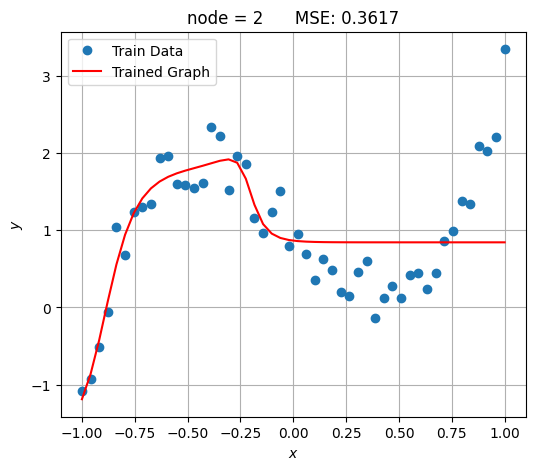

In [8]:
features_xx = np.linspace(-1,1,50)
features_xx = features_xx.reshape(50,1)
Under_yhat_1 = Under_model_1(features_xx)

plt.figure(figsize=(6, 5))
plt.plot(x_train,y_train,'o', label = 'Train Data')
plt.plot(features_xx, Under_yhat_1, 'r-', label = "Trained Graph")
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('node = 2      MSE: {:5.4f}'.format(loss(y_train,Under_model_1(x_train))))
plt.legend()
plt.show()

#### 과소적합 해결 모델 정의 (# node: 2 -> 5)

In [9]:
class Under_MyModel_2(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 5
        num_hidden2 = 5

        tf.random.set_seed(2) # tf random seed 정의

        self.W1=tf.Variable(tf.random.normal([1,num_hidden1],seed=2023),name='weight1')
        self.b1=tf.Variable(tf.zeros([num_hidden1]),name='bias1')
        
        self.W2=tf.Variable(tf.random.normal([num_hidden1,num_hidden2],seed=2023),name='weight2')
        self.b2=tf.Variable(tf.zeros([num_hidden2]),name='bias2')
        
        self.W3=tf.Variable(tf.random.normal([num_hidden2,1],seed=2023),name='weight3')
        self.b3=tf.Variable(tf.zeros([1]),name='bias3')
    def call(self,x):
        l1=tf.matmul(x,self.W1)+self.b1
        h1=tf.nn.sigmoid(l1)
        
        l2=tf.matmul(h1,self.W2)+self.b2
        h2=tf.nn.sigmoid(l2)

        yhat=tf.matmul(h2,self.W3)+self.b3
        return yhat

##### 과소적합 해결 모델 학습 (같은 조건)
- Epoch: 500
- learning rate: 0.15
- batch size: 10
- optimizer: Adam

In [10]:
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(x_train))
np.random.shuffle(idx)
shuffled_features = x_train[idx]
shuffled_labels = y_train[idx]

# 하이퍼 파라미터
MaxEpochs = 500
lr = 0.15
batch_size = 10
optimizer = tf.keras.optimizers.Adam(lr)

Under_model_2=Under_MyModel_2()
Under_model_2.compile(optimizer = optimizer, loss = loss)
Under_model_2.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, verbose=2, shuffle=False)

Epoch 1/500


5/5 - 1s - loss: 0.8165 - 766ms/epoch - 153ms/step
Epoch 2/500
5/5 - 0s - loss: 0.9516 - 3ms/epoch - 688us/step
Epoch 3/500
5/5 - 0s - loss: 0.7690 - 0s/epoch - 0s/step
Epoch 4/500
5/5 - 0s - loss: 0.8217 - 19ms/epoch - 4ms/step
Epoch 5/500
5/5 - 0s - loss: 0.7739 - 13ms/epoch - 3ms/step
Epoch 6/500
5/5 - 0s - loss: 0.7527 - 16ms/epoch - 3ms/step
Epoch 7/500
5/5 - 0s - loss: 0.7697 - 16ms/epoch - 3ms/step
Epoch 8/500
5/5 - 0s - loss: 0.7518 - 0s/epoch - 0s/step
Epoch 9/500
5/5 - 0s - loss: 0.7481 - 8ms/epoch - 2ms/step
Epoch 10/500
5/5 - 0s - loss: 0.7539 - 32ms/epoch - 6ms/step
Epoch 11/500
5/5 - 0s - loss: 0.7418 - 15ms/epoch - 3ms/step
Epoch 12/500
5/5 - 0s - loss: 0.7425 - 14ms/epoch - 3ms/step
Epoch 13/500
5/5 - 0s - loss: 0.7387 - 14ms/epoch - 3ms/step
Epoch 14/500
5/5 - 0s - loss: 0.7275 - 17ms/epoch - 3ms/step
Epoch 15/500
5/5 - 0s - loss: 0.7217 - 14ms/epoch - 3ms/step
Epoch 16/500
5/5 - 0s - loss: 0.7089 - 14ms/epoch - 3ms/step
Epoch 17/500
5/5 - 0s - loss: 0.6961 - 3ms/epoch

#### 학습된 모델 그래프

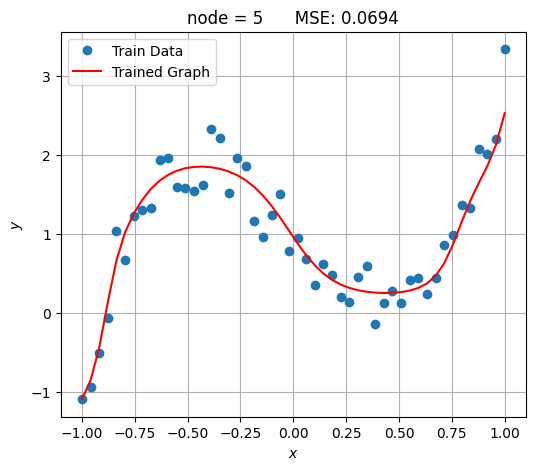

In [11]:
features_xx = np.linspace(-1,1,50)
features_xx = features_xx.reshape(50,1)
Under_yhat_2 = Under_model_2(features_xx)

plt.figure(figsize=(6, 5))
plt.plot(x_train,y_train,'o', label = 'Train Data')
plt.plot(features_xx, Under_yhat_2, 'r-', label = 'Trained Graph')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('node = 5      MSE: {:5.4f}'.format(loss(y_train,Under_model_2(x_train))))
plt.legend()
plt.show()

##### 두 모델 비교

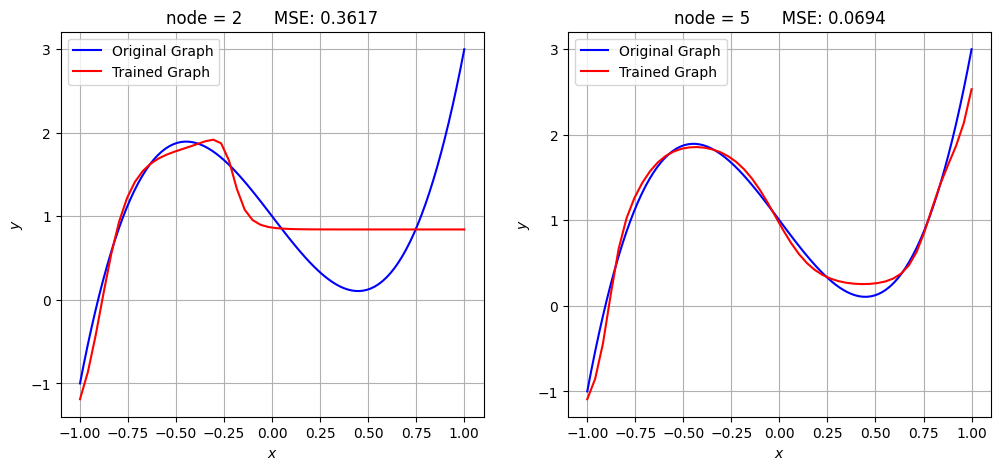

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x2,y2,'b-', label = 'Original Graph')
plt.plot(features_xx, Under_yhat_1, 'r-', label = 'Trained Graph')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('node = 2      MSE: {:5.4f}'.format(loss(y_train,Under_model_1(x_train))))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x2,y2,'b-', label = 'Original Graph')
plt.plot(features_xx, Under_yhat_2, 'r-', label = 'Trained Graph')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('node = 5      MSE: {:5.4f}'.format(loss(y_train,Under_model_2(x_train))))
plt.legend()
plt.show()

## 2. 과적합(Over Fitting) 해결법
- 조기 종료(early stopping)

##### 학습 데이터와 검증 데이터 생성

In [13]:
shuffle_x = copy.deepcopy(x)
shuffle_y = copy.deepcopy(y)

shuffled_id = np.arange(0, len(x))
np.random.shuffle(shuffled_id)
shuffled_features = shuffle_x[shuffled_id]
shuffled_labels = shuffle_y[shuffled_id]

x_train2 = shuffled_features[:40]
y_train2 = shuffled_labels[:40]
x_validation2 = shuffled_features[40:]
y_validation2 = shuffled_labels[40:]

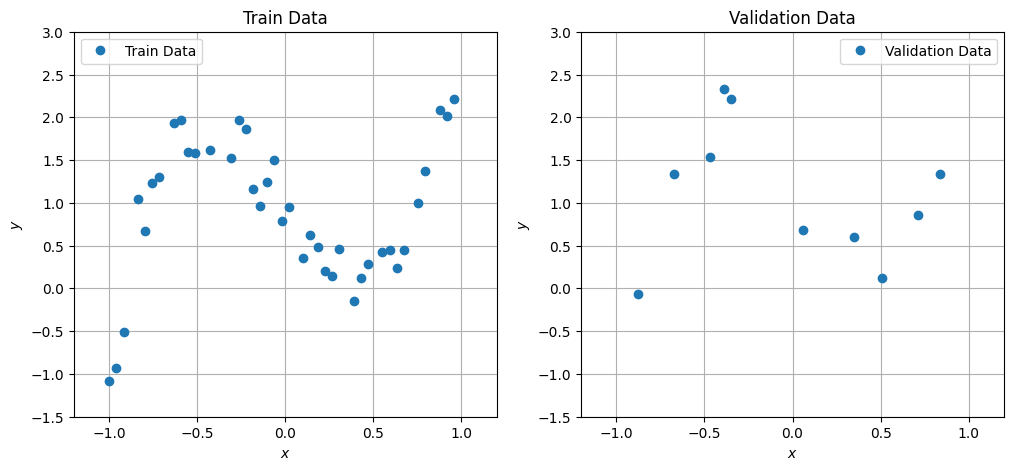

In [14]:
# 학습 데이터 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_train2,y_train2,'o', label = 'Train Data')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Train Data')
plt.xlim(-1.2,1.2)
plt.ylim(-1.5,3)
plt.legend()

# 테스트 데이터 그래프
plt.subplot(1, 2, 2)
plt.plot(x_validation2,y_validation2,'o', label = 'Validation Data')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Validation Data')
plt.xlim(-1.2,1.2)
plt.ylim(-1.5,3)
plt.legend()
plt.show()

In [15]:
# 학습 데이터 shape 변경
x_train2 = x_train2.reshape(len(x_train2),1)
y_train2 = y_train2.reshape(len(y_train2),1)

# 테스트 데이터 shape 변경
x_validation2 = x_validation2.reshape(len(x_validation2),1)
y_validation2 = y_validation2.reshape(len(y_validation2),1)

# loss 함수 정의
loss = tf.keras.losses.MeanSquaredError()

#### 학습 모델 정의(# node: 50, # hidden layer: 5)

In [16]:
class Over_MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 50
        num_hidden2 = 50
        num_hidden3 = 50
        num_hidden4 = 50
        num_hidden5 = 50

        tf.random.set_seed(2) # tf random seed 정의

        self.W1=tf.Variable(tf.random.normal([1,num_hidden1],seed=2023),name='weight1')
        self.b1=tf.Variable(tf.zeros([num_hidden1]),name='bias1')
        
        self.W2=tf.Variable(tf.random.normal([num_hidden1,num_hidden2],seed=2023),name='weight2')
        self.b2=tf.Variable(tf.zeros([num_hidden2]),name='bias2')
        
        self.W3=tf.Variable(tf.random.normal([num_hidden2,num_hidden3],seed=2023),name='weight3')
        self.b3=tf.Variable(tf.zeros([num_hidden3]),name='bias3')

        self.W4=tf.Variable(tf.random.normal([num_hidden3,num_hidden4],seed=2023),name='weight4')
        self.b4=tf.Variable(tf.zeros([num_hidden4]),name='bias4')

        self.W5=tf.Variable(tf.random.normal([num_hidden4,num_hidden5],seed=2023),name='weight5')
        self.b5=tf.Variable(tf.zeros([num_hidden5]),name='bias5')

        self.W6=tf.Variable(tf.random.normal([num_hidden5,1],seed=2023),name='weight6')
        self.b6=tf.Variable(tf.zeros([1]),name='bias6')
        
    def call(self,x):
        l1=tf.matmul(x,self.W1)+self.b1
        h1=tf.nn.relu(l1)
        
        l2=tf.matmul(h1,self.W2)+self.b2
        h2=tf.nn.sigmoid(l2)

        l3=tf.matmul(h2,self.W3)+self.b3
        h3=tf.nn.sigmoid(l3)

        l4=tf.matmul(h3,self.W4)+self.b4
        h4=tf.nn.sigmoid(l4)

        l5=tf.matmul(h4,self.W5)+self.b5
        h5=tf.nn.sigmoid(l5)
        
        yhat=tf.matmul(h5,self.W6)+self.b6
        return yhat

#### 모델 학습
- Epochs: 1000
- learning rate: 0.001
- batch size: 10
- optimizer: Adam

In [17]:
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(x_train2))
np.random.shuffle(idx)
shuffled_features = x_train2[idx]
shuffled_labels = y_train2[idx]        
        
# 하이퍼 파라미터
MaxEpochs = 1000
lr = 0.001
batch_size = 10
optimizer = tf.keras.optimizers.Adam(lr)   
        
# 모델 생성
Over_model_1 = Over_MyModel()
Over_model_1.compile(optimizer=optimizer, loss=loss)

# LossHistory 콜백 생성
history_callback = LossHistory()

# 모델 학습
history = Over_model_1.fit(shuffled_features, shuffled_labels, epochs=MaxEpochs, batch_size=batch_size, 
                           validation_data=(x_validation2, y_validation2), verbose=2, shuffle=False,
                           callbacks=[history_callback])

Epoch 1/1000


4/4 - 2s - loss: 36.6845 - val_loss: 26.5272 - 2s/epoch - 438ms/step
Epoch 2/1000
4/4 - 0s - loss: 24.0899 - val_loss: 16.3115 - 77ms/epoch - 19ms/step
Epoch 3/1000
4/4 - 0s - loss: 14.5567 - val_loss: 9.0043 - 41ms/epoch - 10ms/step
Epoch 4/1000
4/4 - 0s - loss: 8.1332 - val_loss: 4.4067 - 33ms/epoch - 8ms/step
Epoch 5/1000
4/4 - 0s - loss: 4.2959 - val_loss: 1.9357 - 36ms/epoch - 9ms/step
Epoch 6/1000
4/4 - 0s - loss: 2.2933 - val_loss: 0.8896 - 64ms/epoch - 16ms/step
Epoch 7/1000
4/4 - 0s - loss: 1.4361 - val_loss: 0.6348 - 57ms/epoch - 14ms/step
Epoch 8/1000
4/4 - 0s - loss: 1.1833 - val_loss: 0.7122 - 58ms/epoch - 15ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.1639 - val_loss: 0.8403 - 56ms/epoch - 14ms/step
Epoch 10/1000
4/4 - 0s - loss: 1.1658 - val_loss: 0.8874 - 52ms/epoch - 13ms/step
Epoch 11/1000
4/4 - 0s - loss: 1.1077 - val_loss: 0.8344 - 45ms/epoch - 11ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.9940 - val_loss: 0.7218 - 33ms/epoch - 8ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.8636

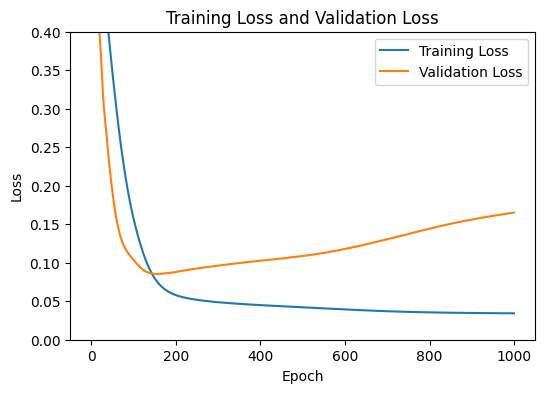

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(history_callback.losses, label='Training Loss')
plt.plot(history_callback.val_losses, label='Validation Loss')
plt.title('Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 0.4)  # 원하는 y축 범위 설정
plt.legend()
plt.show()

#### 학습된 모델 그래프

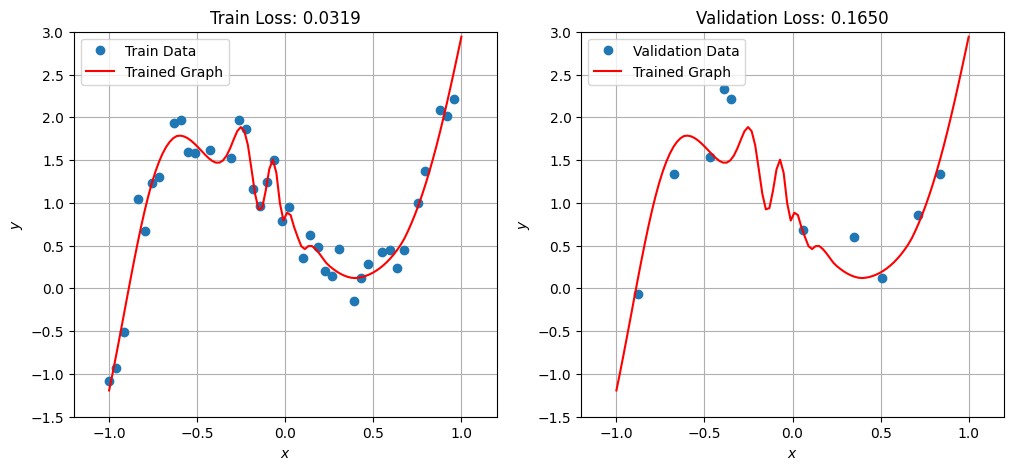

In [19]:
features_xx = np.linspace(-1,1,100)
features_xx = features_xx.reshape(100,1)
Over_yhat_1 = Over_model_1(features_xx)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_train2,y_train2,'o', label = 'Train Data')
plt.plot(features_xx, Over_yhat_1, 'r-', label = 'Trained Graph')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Train Loss: {:5.4f}'.format(loss(y_train2,Over_model_1(x_train2))))
plt.xlim(-1.2,1.2)
plt.ylim(-1.5,3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_validation2,y_validation2,'o', label = 'Validation Data')
plt.plot(features_xx, Over_yhat_1, 'r-', label = 'Trained Graph')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Validation Loss: {:5.4f}'.format(loss(y_validation2,Over_model_1(x_validation2))))
plt.xlim(-1.2,1.2)
plt.ylim(-1.5,3)
plt.legend()
plt.show()

#### 모델 학습(조기 종료, 같은 조건)
- Epochs: 1000
- learning rate: 0.001
- batch size: 10
- optimizer: Adam

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(x_train2))
np.random.shuffle(idx)
shuffled_features = x_train2[idx]
shuffled_labels = y_train2[idx]

# 하이퍼 파라미터
MaxEpochs = 1000
lr = 0.001
batch_size = 10
optimizer = tf.keras.optimizers.Adam(lr)
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

Over_model_2=Over_MyModel()
Over_model_2.compile(optimizer = optimizer, loss = loss)
Over_model_2.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, 
                 validation_data = (x_validation2, y_validation2), callbacks=[early_stopping], verbose=2, shuffle=False)

Epoch 1/1000
4/4 - 2s - loss: 36.6845 - val_loss: 26.5272 - 2s/epoch - 380ms/step
Epoch 2/1000
4/4 - 0s - loss: 24.0899 - val_loss: 16.3115 - 64ms/epoch - 16ms/step
Epoch 3/1000
4/4 - 0s - loss: 14.5567 - val_loss: 9.0043 - 37ms/epoch - 9ms/step
Epoch 4/1000
4/4 - 0s - loss: 8.1332 - val_loss: 4.4067 - 50ms/epoch - 12ms/step
Epoch 5/1000
4/4 - 0s - loss: 4.2959 - val_loss: 1.9357 - 42ms/epoch - 11ms/step
Epoch 6/1000
4/4 - 0s - loss: 2.2933 - val_loss: 0.8896 - 49ms/epoch - 12ms/step
Epoch 7/1000
4/4 - 0s - loss: 1.4361 - val_loss: 0.6348 - 52ms/epoch - 13ms/step
Epoch 8/1000
4/4 - 0s - loss: 1.1833 - val_loss: 0.7122 - 58ms/epoch - 15ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.1639 - val_loss: 0.8403 - 93ms/epoch - 23ms/step
Epoch 10/1000
4/4 - 0s - loss: 1.1658 - val_loss: 0.8874 - 49ms/epoch - 12ms/step
Epoch 11/1000
4/4 - 0s - loss: 1.1077 - val_loss: 0.8344 - 36ms/epoch - 9ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.9940 - val_loss: 0.7218 - 44ms/epoch - 11ms/step
Epoch 13/1000
4/4 - 0s 

#### 학습된 모델 그래프

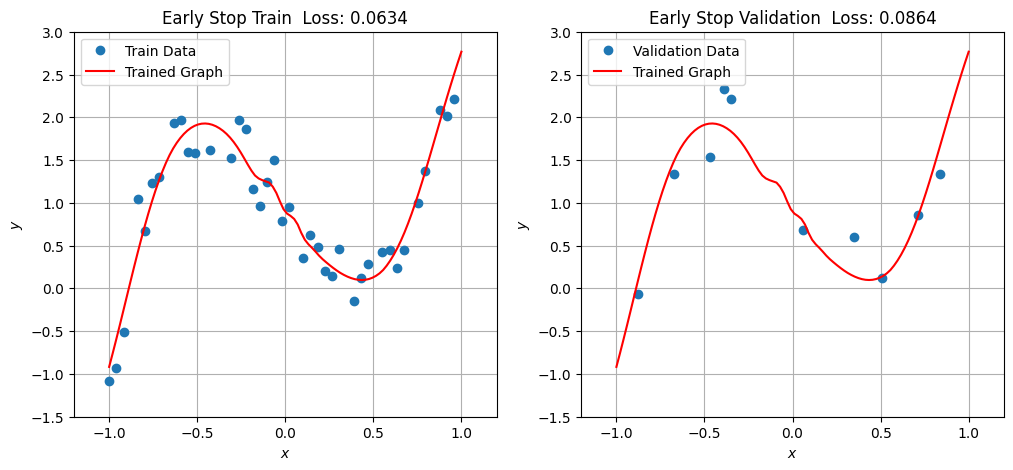

In [21]:
features_xx = np.linspace(-1,1,100)
features_xx = features_xx.reshape(100,1)
Over_yhat_2 = Over_model_2(features_xx)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_train2,y_train2,'o', label = 'Train Data')
plt.plot(features_xx, Over_yhat_2, 'r-', label = 'Trained Graph')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Early Stop Train  Loss: {:5.4f}'.format(loss(y_train2,Over_model_2(x_train2))))
plt.xlim(-1.2,1.2)
plt.ylim(-1.5,3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_validation2,y_validation2,'o', label = 'Validation Data')
plt.plot(features_xx, Over_yhat_2, 'r-', label = 'Trained Graph')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Early Stop Validation  Loss: {:5.4f}'.format(loss(y_validation2,Over_model_2(x_validation2))))
plt.xlim(-1.2,1.2)
plt.ylim(-1.5,3)
plt.legend()
plt.show()

#### 두 학습법 비교

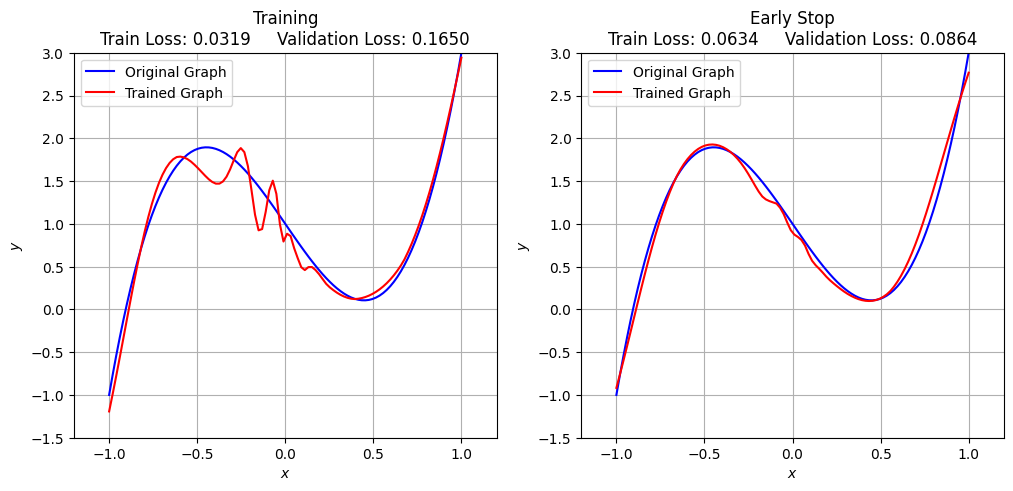

In [22]:
Over_curr_loss_1 = loss(y_train2,Over_model_1(x_train2))
Over_curr_loss2_1 = loss(y_validation2,Over_model_1(x_validation2))
Over_curr_loss_2 = loss(y_train2,Over_model_2(x_train2))
Over_curr_loss2_2 = loss(y_validation2,Over_model_2(x_validation2))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x2,y2,'b-', label = 'Original Graph')
plt.plot(features_xx, Over_yhat_1, 'r-', label = 'Trained Graph')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Training\nTrain Loss: {:5.4f}     Validation Loss: {:5.4f}'.format(Over_curr_loss_1,Over_curr_loss2_1))
plt.xlim(-1.2,1.2)
plt.ylim(-1.5,3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x2,y2,'b-', label = 'Original Graph')
plt.plot(features_xx, Over_yhat_2, 'r-', label = 'Trained Graph')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Early Stop\nTrain Loss: {:5.4f}     Validation Loss: {:5.4f}'.format(Over_curr_loss_2,Over_curr_loss2_2))
plt.xlim(-1.2,1.2)
plt.ylim(-1.5,3)
plt.legend()
plt.show()

## 3. 모델 저장 및 불러오기


##### 모델 저장 (저장 위치: 현재 파일이 있는 폴더)
<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 모델이름.save('저장위치/파일명')
- ex) Under_model_1 = Under_MyModel_1()
    - Under_model_1.save('saved_Under_model_1')

In [23]:
# Under_model_1 = Under_MyModel_1()
# Under_model_2 = Under_MyModel_2()
# Over_model_1 = Over_MyModel()
Under_model_1.save('saved_Under_model_1')
Under_model_2.save('saved_Under_model_2')
Over_model_1.save('saved_Over_model_1')

INFO:tensorflow:Assets written to: saved_Under_model_1\assets


INFO:tensorflow:Assets written to: saved_Under_model_1\assets


INFO:tensorflow:Assets written to: saved_Under_model_2\assets


INFO:tensorflow:Assets written to: saved_Under_model_2\assets


INFO:tensorflow:Assets written to: saved_Over_model_1\assets


INFO:tensorflow:Assets written to: saved_Over_model_1\assets


##### 모델 불러오기 (파일명)
<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; tf.keras.models.load_model('파일위치/파일명')
- ex) model_1 = tf.keras.models.load_model('saved_Under_model_1')

In [24]:
model_1 = tf.keras.models.load_model('saved_Under_model_1')
model_2 = tf.keras.models.load_model('saved_Under_model_2')
model_3 = tf.keras.models.load_model('saved_Over_model_1')

##### 새로 불러온 모델과 원래 모델 비교

In [25]:
print("Under_model_1.W1: ", *Under_model_1.W1.numpy())
print("model_1.W1:       ", *model_1.W1.numpy())
print("")
print("Under_model_1.b1: ", *Under_model_1.b1.numpy())
print("model_1.b1:       ", *model_1.b1.numpy())
print("")
print("Under_model_1.W2: ", *Under_model_1.W2.numpy())
print("model_1.W2:       ", *model_1.W2.numpy())
print("")
print("Under_model_1.b2: ", *Under_model_1.b2.numpy())
print("model_1.b2:       ", *model_1.b2.numpy())
print("")
print("Under_model_1.W3: ", *Under_model_1.W3.numpy())
print("model_1.W3:       ", *model_1.W3.numpy())
print("")
print("Under_model_1.b3: ", *Under_model_1.b3.numpy())
print("model_1.b3:       ", *model_1.b3.numpy())

Under_model_1.W1:  [  7.312632 -13.744601]
model_1.W1:        [  7.312632 -13.744601]

Under_model_1.b1:  7.012293 -3.7310212
model_1.b1:        7.012293 -3.7310212

Under_model_1.W2:  [-7.7861543 -1.1703614] [ 1.9145889 10.438832 ]
model_1.W2:        [-7.7861543 -1.1703614] [ 1.9145889 10.438832 ]

Under_model_1.b2:  3.2029517 -1.3615263
model_1.b2:        3.2029517 -1.3615263

Under_model_1.W3:  [-3.798031] [1.2861964]
model_1.W3:        [-3.798031] [1.2861964]

Under_model_1.b3:  0.7865155
model_1.b3:        0.7865155
